# 11种经典时间序列预测方法
1. 自回归 (AR)
2. 移动平均线 (MA)
3. 自回归移动平均线 (ARMA)
4. 自回归综合移动平均线 (ARIMA)
5. 季节性自回归综合移动平均线 (SARIMA)
6. 具有外生回归量的季节性自回归综合移动平均 (SARIMAX)
7. 向量自回归 (VAR)
8. 向量自回归移动平均 (VARMA)
9. 具有外生回归量的向量自回归移动平均 (VARMAX)
10. 简单指数平滑 (SES)
11. Holt Winter 的指数平滑 (HWES)

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

在ARIMA中，.predict的参数表示预测位置。这样就能理解了。
预测第一位nan ，第二位 第三位
statsmodels.tsa.ar_model.AutoReg第一位是nan
statsmodels.tsa.arima.model第一位是无用值

[1, 2, 3, 4, 5, 6]
[nan  2.  3.  4.  5.  6.  7.]


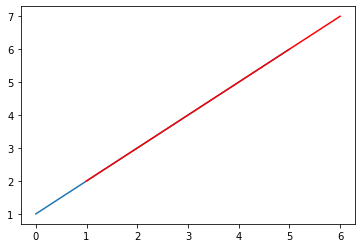

In [82]:
# AR example
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from random import random

# 数据
data = [1,2,3,4,5,6]

# 模型拟合
model = AutoReg(data, lags=1) #AR(1)
model_fit = model.fit()

# 做预测
yhat = model_fit.predict(0,len(data))
plt.plot(data)
print(data)
plt.plot(yhat,color='red',label='AR(2) Model')
print(yhat)


Coefficients:[ 3.49959536e+00  1.99997074e+00 -9.99989294e-01  2.98570547e-06]
[1, 2, 3, 4, 5, 6]
[3.49959536 1.00002319 3.00001712 3.99999856 4.99998001 5.99996145
 6.9999429 ]


D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


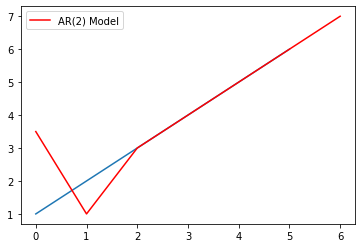

In [88]:
# AR example

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# dataset
data = [1,2,3,4,5,6]

model=ARIMA(data,order=(2,0,0))   ##AR(2)
model_fit=model.fit()
#这三个参数得出来 就可以用上面得得模拟数据来进行预测了
#用ARIMA 多出来一个sigma2方差
print("Coefficients:%s" % model_fit.params)

##这里和上面比较，说明他第一个值就是个无用值
x_ar=model_fit.predict(0,len(data),dynamic=False)
plt.plot(data)
print(data)
print(x_ar)
plt.plot(x_ar,color='red',label='AR(2) Model')
#x_ar的第一个值无意义
plt.legend(loc='best')

In [89]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]


# fit model
#statsmodels.tsa.arima.model.ARIMA  包含了AR MA ARIMA SARIMA 
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction

#这样直接往后预测一位
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[72.90055638]


D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [91]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# 该方法适用于没有趋势和季节成分的单变量时间序列。

# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data),len(data))
print(yhat)


[0.45261712]


In [93]:
# ARIMA example
# ARIMA先进行了差分预处理，消除趋势
# 该方法适用于具有趋势且无季节性成分的单变量时间序列。
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.64584876]


D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# SARIMA example

# SARIMA考虑了季节性观测值和季节性误差
# 该方法适用于具有趋势和/或季节性成分的单变量时间序列

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

99
100


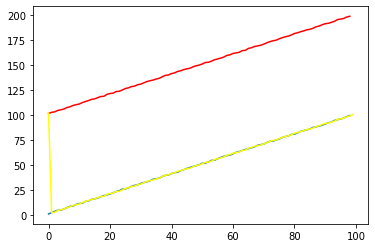

In [111]:
# SARIMAX example

#具有外生回归量的季节性自回归综合移动平均 ( SARIMAX ) 是 SARIMA 模型的扩展

#SARIMAX 方法还可用于对包含外生变量的包含模型进行建模，例如 ARX、MAX、ARMAX 和 ARIMAX。

#该方法适用于具有趋势和/或季节性成分以及外生变量的单变量时间序列。

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101,200)] #外生变量

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(0, len(data1), exog=[exog2])
plt.plot(data1)
plt.plot(data2,color="red")
plt.plot(yhat,color="yellow")
print(len(data1))
print(yhat.size)

In [199]:
# 向量自回归 (VAR) 方法使用 AR 模型对每个时间序列中的下一步进行建模。它是将 AR 推广到多个并行时间序列，例如多变量时间序列。
# 模型的符号包括将 AR(p) 模型的阶数指定为 VAR 函数的参数，例如 VAR(p)。
# 该方法适用于没有趋势和季节成分的多元时间序列。

# VAR example

from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# 数据
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
# fit model
model = VAR(data)
model_fit = model.fit() #查API 返回VARResults
# make prediction
yhat = model_fit.forecast(model.y, steps=1) #model.y，就是原数据，稍稍处理一下的
print(yhat)

[[100.90171231 101.43470237]]


C:\Users\shen7\AppData\Local\Temp\ipykernel_52760\4220511031.py:21: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  yhat = model_fit.forecast(model.y, steps=1) #model.y，就是原数据，稍稍处理一下的


D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.50920157 0.89299976]
 [0.4887026  0.95942303]
 [0.48715168 0.96574652]]


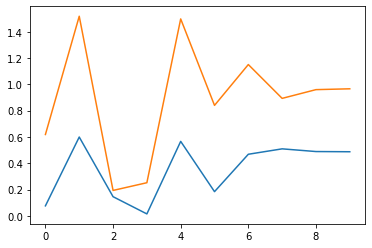

In [198]:
# VARMA example

#模型的符号包括将 AR(p) 和 MA(q) 模型的阶数指定为 VARMA 函数的参数，
#例如 VARMA(p, q)。VARMA 模型也可用于开发 VAR 或 VMA 模型。

#它是将 ARMA 推广到多个并行时间序列，例如多变量时间序列。

#该方法适用于没有趋势和季节成分的多元时间序列。

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
import numpy as np
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(3)
print(yhat)
yhat=yhat.tolist()
all_data=data+yhat#将原数据和预测数据拼接了
plt.plot(all_data[-10:])#显示后7个原数据和预测的三步数据


In [201]:
# VARMAX example

#具有外生回归量的向量自回归移动平均 (VARMAX) 是 VARMA 模型的扩展，
#该模型还包括外生变量的建模。。

#VARMAX 方法也可用于对包含外生变量的包含模型进行建模，例如 VARX 和 VMAX

#它是 ARMAX 方法的多变量版本。

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row) 
data_exog = [x + random() for x in range(100)]#外生变量

# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.49139057 1.02106047]]


D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [202]:
# SES example 简单指数平滑，单指数平滑
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.5139112]


In [203]:
# HWES example

#Holt Winter 的指数平滑法( HWES) 也称为三重指数平滑法，
#将下一个时间步长建模为先前时间步长的观测值的指数加权线性函数，
#同时考虑了趋势和季节性


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.2664647]
